## Credit card score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#we can see the file without load it
!head data/CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


In [15]:
df = pd.read_csv('data/CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [16]:
df.columns

Index(['Status', 'Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records',
       'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'],
      dtype='object')

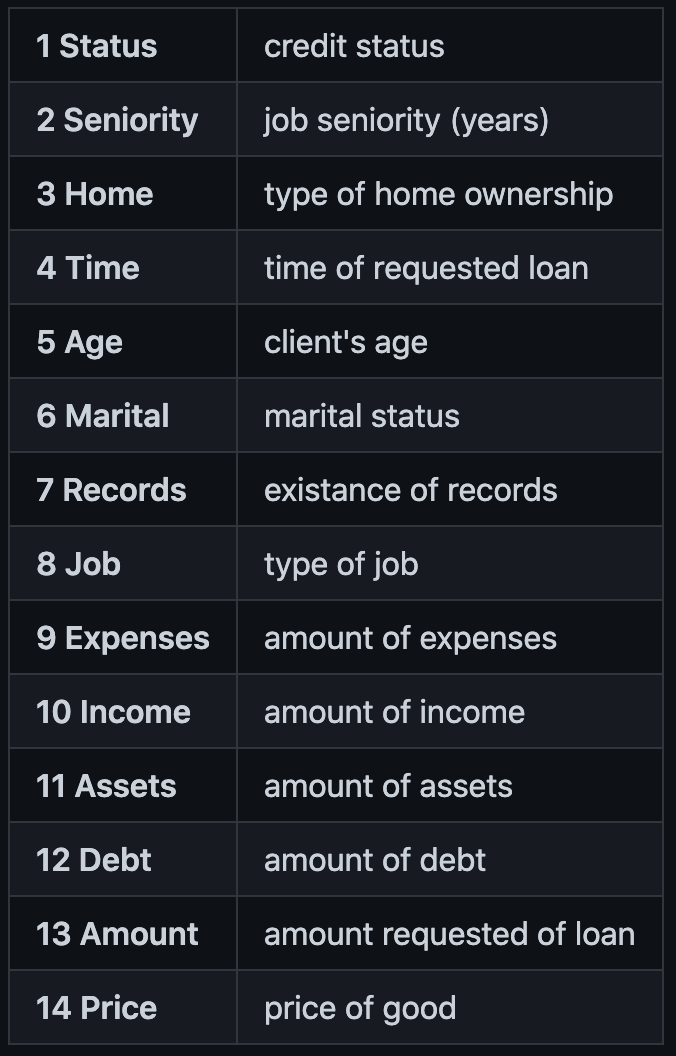

In [17]:
df.columns = df.columns.str.lower().str.strip()
df.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

In [18]:
df.isnull().sum()

status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

In [19]:
# this time we are going to convert numbers into categorical variables
status_values = {
    1:'ok', 
    2:'default', 
    0:'unk'
}

df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [20]:
home_values = {
    1:'rent', 
    2:'owner', 
    3:'private',
    4:'ignore',
    5:'parents',
    6:'other',
    0:'unk'
}

df.home =  df.home.map(home_values)

marital_values = {
    1:'single', 
    2:'married', 
    3:'widow',
    4:'separated',
    5:'divorced',
    0:'unk'
}

df.marital = df.marital.map(marital_values)

record_values = {
    1:'no', 
    2:'yes', 
    0:'unk',
}

df.records = df.records.map(record_values)

job_values = {
    1:'fixed', 
    2:'partime', 
    3:'freelance',
    4:'other',
    0:'unk'
}

df.job = df.job.map(job_values)

df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [21]:
df.dtypes

status       object
seniority     int64
home         object
time          int64
age           int64
marital      object
records      object
job          object
expenses      int64
income        int64
assets        int64
debt          int64
amount        int64
price         int64
dtype: object

In [23]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [24]:
#those are missing values
df.income.max()

99999999

In [27]:
for c in['income','assets','debt']:
    df[c].replace(to_replace=99999999, value=np.nan, inplace=True)

In [28]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4421.000000,4408.000000,4437.000000,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,130.568197,5403.433984,342.948614,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,86.367434,11573.161523,1245.861736,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000


In [31]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [32]:
df = df[df['status'] != 'unk'].copy()

In [33]:
df.reset_index()

,index,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,4450,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4450,4451,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4451,4452,default,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4452,4453,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


In [34]:
#now we want to split our dataset for training
from sklearn.model_selection import train_test_split

X, y = train_test_split(df, test_size=0.2, random_state=11)

#now we are going to split the dataframe train and validation

df_train, df_val = train_test_split(X, test_size=0.2, random_state=11)

In [36]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [52]:
df_test = y
df_test

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,default,3,owner,36,26,single,no,freelance,35,0.0,60000.0,3000.0,800,1000
1,ok,10,rent,60,28,married,no,fixed,78,325.0,18.0,3000.0,2250,2250
2,ok,14,rent,60,41,married,no,fixed,53,181.0,0.0,0.0,1150,2497
3,ok,4,owner,60,39,married,no,freelance,45,0.0,7500.0,0.0,1300,1508
4,default,1,other,30,20,single,no,fixed,35,90.0,0.0,0.0,450,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,ok,19,owner,12,42,married,no,fixed,90,464.0,5000.0,0.0,1100,2413
887,ok,7,owner,36,24,married,no,fixed,45,95.0,3000.0,0.0,1000,1597
888,ok,0,owner,24,28,married,no,partime,45,219.0,6000.0,0.0,600,943
889,default,8,other,36,30,married,yes,freelance,75,100.0,4000.0,1365.0,1220,1745


In [46]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test == 'default').astype('int').values

In [53]:
del df_train['status']
del df_val['status']
del df_test['status']


In [54]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,15,owner,60,34,married,no,fixed,45,82.0,3500.0,0.0,750,1624
1,7,parents,60,30,single,no,fixed,35,95.0,0.0,0.0,900,1158
2,10,owner,36,47,married,no,fixed,60,133.0,3000.0,0.0,360,360
3,5,owner,48,39,married,yes,freelance,45,100.0,30000.0,0.0,1550,2294
4,14,owner,36,40,married,no,fixed,45,80.0,3000.0,0.0,900,1263
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2846,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2847,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2848,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


In [189]:
nums = [2, 7, 11, 15]
target = 9
# Output: [0, 1]
nums2 = [5, 7, 11, 4]
# Output: [0, 3]
nums3 = [3, 7, 11, 4]

nums3 = [3, 3, 11, 4]

nums4 = [ 2,3,2]

nums5 = [-1,-2,-3,-4,-5]


In [190]:
def sum_two(nums, target):
    dict_nums = {}
    for i, val in enumerate(nums):
        diff = target - val
        
        if diff in dict_nums:
            return [dict_nums[diff], i]
            
        dict_nums[val] = i
                    
        
    return []
        
    

In [191]:
sum_two(nums5, -8)

[2, 4]

# Decision trees

In [192]:
df_train.iloc[0].to_dict()

{'seniority': 15,
 'home': 'owner',
 'time': 60,
 'age': 34,
 'marital': 'married',
 'records': 'no',
 'job': 'fixed',
 'expenses': 45,
 'income': 82.0,
 'assets': 3500.0,
 'debt': 0.0,
 'amount': 750,
 'price': 1624}

In [212]:
# we can learn rules from the data

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer

from sklearn.metrics import roc_auc_score

In [213]:
# we need to handle the nan values with zeros or other values

train_dicts = df_train.fillna(0).to_dict(orient='records')



In [214]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [215]:
dv.get_feature_names()


['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=other',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [216]:
#train the decision tree
# with need  remember to fill our nan with zero

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [217]:
val_dict = df_val.fillna(0).to_dict(orient='records')

X_val = dv.transform(val_dict)



In [218]:
X_val

array([[3.100e+01, 5.500e+02, 0.000e+00, ..., 0.000e+00, 6.000e+00,
        3.600e+01],
       [3.800e+01, 1.000e+03, 0.000e+00, ..., 0.000e+00, 1.800e+01,
        6.000e+01],
       [4.000e+01, 7.000e+02, 0.000e+00, ..., 1.000e+00, 1.700e+01,
        2.400e+01],
       ...,
       [2.800e+01, 1.055e+03, 1.750e+03, ..., 0.000e+00, 9.000e+00,
        6.000e+01],
       [6.400e+01, 9.840e+02, 9.000e+03, ..., 0.000e+00, 4.000e+00,
        6.000e+01],
       [6.100e+01, 6.000e+02, 2.500e+03, ..., 0.000e+00, 1.300e+01,
        3.600e+01]])

In [222]:
y_pred =  dt.predict_proba(X_val)[:,1]

In [225]:
roc_auc_score(y_val, y_pred)

0.6659107981220658

In [226]:
#now we can see the roc in the training set

y_pred_train = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred_train)

1.0

In [227]:
#now we are going to retrain the decision tree
# with max deepth = 

dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [228]:
# calculate y in the validation set
y_pred =  dt.predict_proba(X_val)[:,1]

In [229]:
roc_auc_score(y_val, y_pred)

0.7477511737089203

In [230]:
y_pred_train = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred_train)

0.7700033886231307

In [232]:
dt = DecisionTreeClassifier(max_depth=5)

dt.fit(X_train, y_train) 

# calculate y in the validation set
y_pred =  dt.predict_proba(X_val)[:,1]

roc_auc_score(y_val, y_pred)

0.7698356807511737

In [233]:
y_pred_train = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred_train)

0.8383203188768569

In [234]:
dt = DecisionTreeClassifier(max_depth=10)

dt.fit(X_train, y_train) 

# calculate y in the validation set
y_pred =  dt.predict_proba(X_val)[:,1]

roc_auc_score(y_val, y_pred)

0.7285539906103287

In [235]:
y_pred_train = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred_train)

0.9611232790988736

In [243]:
roc_gr = []
for i in range(20):
    dt = DecisionTreeClassifier(max_depth=i+1)

    dt.fit(X_train, y_train) 

    # calculate y in the validation set
    y_pred =  dt.predict_proba(X_val)[:,1]

    val_roc = roc_auc_score(y_val, y_pred)
    
    y_pred_train = dt.predict_proba(X_train)[:,1]
    train_roc = roc_auc_score(y_train, y_pred_train)
    
    print('val-roc ', val_roc, 'train-roc', train_roc, 'depth:', i+1,'\n')
    roc_gr.append([val_roc,train_roc])

val-roc  0.6073192488262912 train-roc 0.6264061549268601 depth: 1 

val-roc  0.6759624413145541 train-roc 0.7012100105368865 depth: 2 

val-roc  0.7477511737089203 train-roc 0.7700033886231307 depth: 3 

val-roc  0.7730892018779343 train-roc 0.810346245553978 depth: 4 

val-roc  0.7698356807511737 train-roc 0.8383203188768569 depth: 5 

val-roc  0.7767840375586854 train-roc 0.8676340732239409 depth: 6 

val-roc  0.7709014084507042 train-roc 0.8946295888635497 depth: 7 

val-roc  0.7493990610328638 train-roc 0.9217079649957705 depth: 8 

val-roc  0.7199201877934273 train-roc 0.945617854828417 depth: 9 

val-roc  0.7274647887323944 train-roc 0.9609145819626311 depth: 10 

val-roc  0.7051361502347419 train-roc 0.9772047074653595 depth: 11 

val-roc  0.6905305164319249 train-roc 0.9879830643046892 depth: 12 

val-roc  0.6852676056338027 train-roc 0.9939610778295003 depth: 13 

val-roc  0.6771173708920187 train-roc 0.9969963071428218 depth: 14 

val-roc  0.6576431924882629 train-roc 0.99829

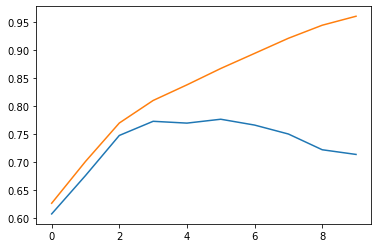

In [240]:
plt.plot(roc_gr)

In [247]:
cf = pd.DataFrame(roc_gr, columns=['test', "train"])

<AxesSubplot:>

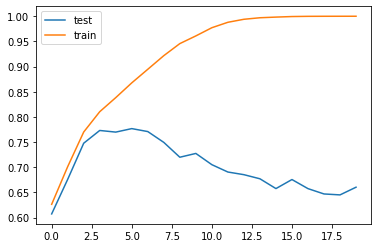

In [254]:
# now check the bias vs variance
cf.plot()

In [250]:
# now check the rules learned
from sklearn.tree import export_text

In [253]:
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train) 

# calculate y in the validation set
y_pred =  dt.predict_proba(X_val)[:,1]

val_roc = roc_auc_score(y_val, y_pred)

y_pred_train = dt.predict_proba(X_train)[:,1]
train_roc = roc_auc_score(y_train, y_pred_train)

print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- seniority <= 1.50
|   |   |   |--- class: 1
|   |   |--- seniority >  1.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0



# now how does it work decision tree


In [255]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

In [256]:
df_exmple = pd.DataFrame(data, columns=['assets','status'])
df_exmple


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [257]:
df_exmple.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [258]:
ts = [2000,3000,4000,5000,8000]

In [273]:
for t in ts:
    df_left = df_exmple[df_exmple.assets <= t]
    df_right = df_exmple[df_exmple.assets > t]
    
    print('asset split as {} '.format(t))
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    
    

asset split as 2000 


,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64
asset split as 3000 


,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64
asset split as 4000 


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64
asset split as 5000 


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64
asset split as 8000 


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64
